## Creating some random points

In [1]:
import numpy as np

In [2]:
# multivariate_normal function generates random points
# around a given mean point and using a covariance matrix

# covariance simply put is the effect of one axis 
# on the given distribution

# covariance matrix
#    x,y
# x [1,0]
# y [0,1]
# this means that the distribution is uniform along both axes

# generates 200 random points for class 1
mean1 = np.array([5,5])
cov1 = np.array([[1,0],[0,1]])
class1 = np.random.multivariate_normal(mean1, cov1, 200)

# generates 200 random points for class 2
mean2 = np.array([8,8])
cov2 = np.array([[1,0],[0,1]])
class2 = np.random.multivariate_normal(mean2, cov2, 200)

# generates 200 random points for class 3
mean3 = np.array([5,10])
cov3 = np.array([[1,0],[0,1]])
class3 = np.random.multivariate_normal(mean3, cov3, 200)

## Plotting the points

In [3]:
# importing matplotlib library for plotting graphs

import matplotlib.pyplot as plt

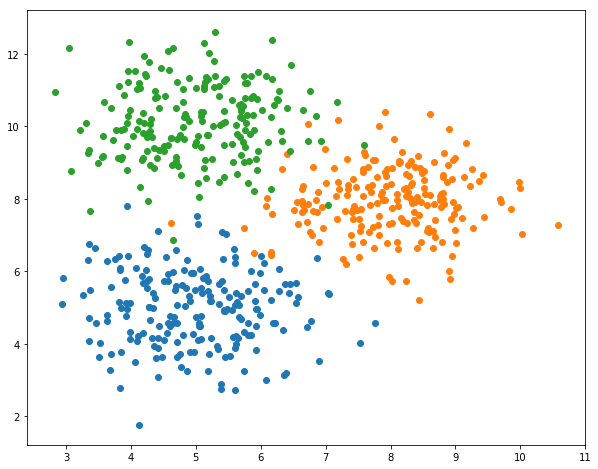

In [4]:
plt.figure(figsize=(10,8))

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])
plt.scatter(class3[:,0], class3[:,1])

plt.show()

## Creating dataset

In [5]:
# appending datapoints from both classes 
# into a single array
features = np.append(class1, class2, axis=0)
features = np.append(features, class3, axis=0)

# generating labels
# 200 zeros, 200 ones, 200 twos in a single array
labels = np.append(np.zeros(200), np.ones(200))
labels = np.append(labels, np.ones(200)+1)

## Creating the model

In [6]:
import keras

# imports sequential model class
from keras.models import Sequential

# imports Dense layer class 
# A layer of perceptrons
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
# since we have 3 classes now
# only 1 and 0 cannot be used to label data

# instead of using 0,1 and 2
# we One-Hot encode the data

# class 0 = [1,0,0]
# class 1 = [0,1,0]
# class 2 = [0,0,1]
labels = keras.utils.to_categorical(labels)

In [8]:
# Creates a sequential model
model = Sequential()

# first layer with 100 neurons
# relu activation
model.add(Dense(100, activation='relu', input_shape=(2,)))

# second layer with 50 neurons
# relu activation
model.add(Dense(50, activation='relu'))

# third layer with 10 neurons
# relu activation
model.add(Dense(10, activation='relu'))

# final output layer
# since we have 3 classes we give 3 output neurons
# softmax activation is used to get 
# probabilties of datapoint belonging to EACH CLASS
model.add(Dense(3, activation='softmax'))

# Compiling the model
# since there are 3 classes
# categorical crossentropy is used for more than 2 categories
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### The final model

In [9]:
# Gives the summary of the model which was just create

# the architecture of this model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 5,893
Trainable params: 5,893
Non-trainable params: 0
_________________________________________________________________


In [10]:
# xtrain = datapoints or features
# ytrain = one-hot encoded labels
# epochs = number of times the model needs to be trained 
# validation_split = How much data to be used for validating the training
# batch_size = how many data points to use at a time

# batch_size = 1 (Stochastic)
# batch_size = all data points (Batch)
# batch_size = between 1 and all (mini-batch)

model.fit(features, labels, epochs=10, batch_size=10)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.9607 - acc: 0.5083
Epoch 2/10
600/600 [==============================] - 0s 215us/step - loss: 0.7823 - acc: 0.6450
Epoch 3/10
600/600 [==============================] - 0s 212us/step - loss: 0.5525 - acc: 0.7367
Epoch 4/10
600/600 [==============================] - 0s 211us/step - loss: 0.4668 - acc: 0.7967
Epoch 5/10
600/600 [==============================] - 0s 208us/step - loss: 0.4129 - acc: 0.8417
Epoch 6/10
600/600 [==============================] - 0s 200us/step - loss: 0.3690 - acc: 0.8717
Epoch 7/10
600/600 [==============================] - 0s 202us/step - loss: 0.3108 - acc: 0.9050
Epoch 8/10
600/600 [==============================] - 0s 201us/step - loss: 0.2591 - acc: 0.9300
Epoch 9/10
600/600 [==============================] - 0s 205us/step - loss: 0.2085 - acc: 0.9517
Epoch 10/10
600/600 [==============================] - 0s 201us/step - loss: 0.1760 - acc: 0.9483


## Evaluating the model

To evaluate the model, we will classify EVERY point on the graph to create a decision boundary and using that boundary we can identify how well the classes are separated from each other

#### creating test points

In [11]:
# generates points between 2 and 12 
# at a distance of 0.05 units
xtest = np.arange(2,13,0.05)

# creates a meshgrid using the points
# for more detailed understanding
# refer "utils" notebook in this folder
xtest = np.meshgrid(xtest,xtest)

# creates a hstack using the points
# for more detailed understanding
# refer "utils" notebook in this folder
xtest = np.hstack([xtest[0].reshape(-1,1), xtest[1].reshape(-1,1)])

In [12]:
# The model.predict gives the probabilty 
# of the sample belonging to EACH CLASS

output = model.predict(xtest)
output

array([[9.9335372e-01, 4.1079153e-03, 2.5383912e-03],
       [9.9335277e-01, 4.1992282e-03, 2.4480256e-03],
       [9.9335325e-01, 4.2861383e-03, 2.3606415e-03],
       ...,
       [1.5774966e-05, 9.9983180e-01, 1.5240960e-04],
       [1.5311061e-05, 9.9984074e-01, 1.4402169e-04],
       [1.4860732e-05, 9.9984896e-01, 1.3609490e-04]], dtype=float32)

In [13]:
# To get the class which has the MAX PROBABILITY 
# that the sample belongs to it
# argmax is used

output = output.argmax(axis=1)

#### Predicting each point on the graph

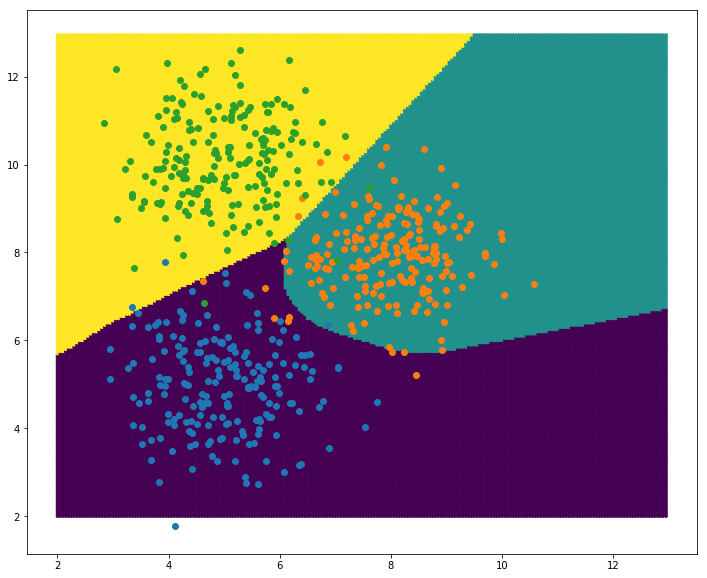

In [14]:
plt.figure(figsize=(12,10))

# plotted all the test point using
# PREDICTIONS AS THE COLORMAP
# for better understanding 
# refer "utils" notebook
plt.scatter(xtest[:,0], xtest[:,1], c=output, s=7)

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])
plt.scatter(class3[:,0], class3[:,1])

plt.show()